1. 부산 기온 데이터 수집
2. 부산에서 가장 더웠던 날은? 검색
3. 매년 크리스마스의 최고 기온과 최저 기온 추이 ; plot
4. 월별 기온 데이터:boxplot


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220921111357.csv',header=7)


#결측치 삭제
df.dropna(inplace=True)
df.isnull().sum()
#rename 작업
df.rename(columns={'평균기온(℃)': '평균기온', 
                   '최저기온(℃)' : '최저기온', 
                   '최고기온(℃)' : '최고기온'},inplace=True)

In [25]:
df.sort_values(by=['최고기온'], ascending= False).head(1)

,날짜,지점,평균기온,최저기온,최고기온
41035,2016-08-14,159,31.7,28.3,37.3


In [23]:
df['날짜'] = df['날짜'].astype('str')
df['날짜'].str.contains('12-25')
chr_date = df[df['날짜'].str.contains('12-25')]

In [21]:
df['날짜'] = df['날짜'].astype('datetime64')
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day


In [22]:
chr_date = chr_date[['최고기온','최저기온','년']]

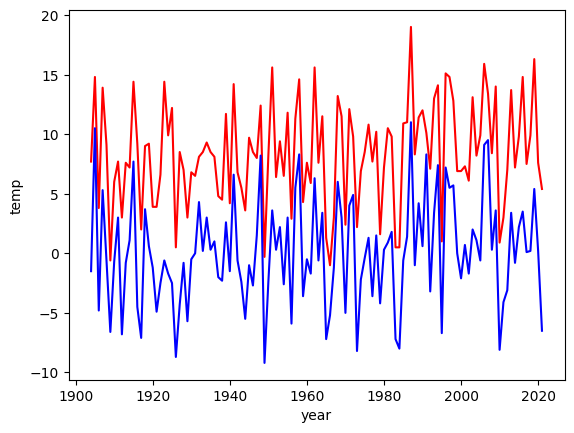

In [20]:
plt.plot(chr_date['년'],chr_date['최고기온'],color='red')
plt.plot(chr_date['년'],chr_date['최저기온'],color='blue')
plt.xlabel('year')
plt.ylabel('temp')
plt.show()

In [19]:
df['날짜'] = df['날짜'].astype('datetime64')
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

avg_month = []

for n in range(1, 13):
    avg_month.append(df.loc[df['월'] == n, '평균기온'])

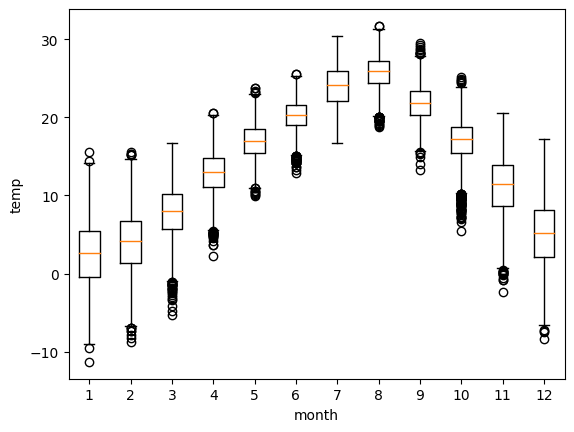

In [26]:
plt.boxplot(avg_month)
plt.xlabel('month')
plt.ylabel('temp')
plt.show()